In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Part 1: Inroduce the data and the purpose ###

 The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).


Source: 

https://archive.ics.uci.edu/ml/datasets/bank+marketing


Additonal machine learning study: 

http://www.columbia.edu/~jc4133/ADA-Project.pdf


The purpose of this project is to determine parameter that migh affect the y varaible.  Based on the columbia paper, the duration variable will be the main focus in that we will look at how changes in duration affect the final outcome.  

For this analysis, we will filter the data in the following ways:
1) Use first time calls in order to elimatinat past the infulences of past calls
2) Only use duration over the mean duration (257 s), assuming that this period of time is the most variable since it is more likely to go beyond scripted conversation.
3) Campaigns that included more than 30 records in order to reduce the bias of the data.  Campaigns with fewer calls could be influenced by other factors. 


### Part 2: EDA ###



In [2]:
#Upload Data
#df = pd.read_csv("bank//bank.csv",delimiter=";")
df = pd.read_csv("bank//bank-additional.csv",delimiter=";")
#df= df_add

#df.shape,df_add.shape

In [3]:
#Sample of the data
pd.set_option('display.max_columns', None)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
#Dataframe dimensions
df.shape
#4119 records (random data sampled from larger dataset)
#21 columns

(4119, 21)

In [5]:
#Datatype of all fields
df.info()
# data type object mainly represents catagorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
# Statistics for numeric features
df.describe()

#Average age is 40
#Average duration is around 4 minutes (257 s)
#Over 75% of the calls by a campagin for a given person was 3
#Min pday of 0 means that someone was called back on the same day


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Check for missing values
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Part 3: Data Cleaning/ Filtering / Transformation 

1) Find conversations that last more than average

2) Only focus on first time call success (i.e. pdays = 999)

3) Create categories by age

In [8]:
#Create a mask to filter data rows
#set the duration to values greater that mean and to those individuals who were never contacted 
mask = (df.duration > df.duration.mean()) & (df.pdays == 999)



In [9]:
#Divide age (range = 70) into 7 groups
#df.describe()["age"]
df["age_label"] = (df.age.values -18) // 10
#df[["age","age_label"]].head(20)

1) Split data into records with yes target vs the total records

2) Look though all the columns of interest and print out the difference in perentage the counts for each each label.

    a. Percentages are calculated in order to normalize percent comparison)

    b. Positive values =  higher portion of group signifies "yes" outcome 





In [10]:

#df_success = df_add[df_add.campaign.isin(successful_camapigns) & mask]
df_success = df[(df.y == "yes") & mask]
mask2 = ((df.duration < df.duration.mean()+200) & (df.duration> 200)) & (df.pdays == 999)
df_control = df[mask2]

# cols = ["day_of_week","job","marital","loan","education","month","age_label"]
# #ToDo: group by age
# for c in cols:

#     ctrl = df_control[c].value_counts(normalize=True).sort_values().to_frame()*100
#     succ = df_success[c].value_counts(normalize=True).sort_values().to_frame()*100
#     print()
#     display(succ-ctrl)



In [11]:
def plot_cat(cat):
    sns.boxplot( x=cat,y="duration",data=df_control);
    plt.title(cat.capitalize()+  " vs Duration")
    plt.xticks(rotation = 90);
    plt.show();

In [12]:
#Function to calcualte the difference in percentages
def percent_diff(field):
    ctrl = df_control[field].value_counts(normalize=True).sort_values().to_frame()*100
    succ = df_success[field].value_counts(normalize=True).sort_values().to_frame()*100

    ctrl = ctrl.reset_index()
    succ = succ.reset_index()
    ctrl.columns = [field,"ctrl"]
    succ.columns = [field,"succ"]

    df_diff = ctrl.merge(succ, on=field)
    df_diff["diff"] = df_diff["succ"] - df_diff["ctrl"] 
    return df_diff


In [13]:

#Age
ctrl = df_control["age_label"].value_counts(normalize=True).sort_values().to_frame()*100
succ = df_success["age_label"].value_counts(normalize=True).sort_values().to_frame()*100

ctrl = ctrl.reset_index()
succ = succ.reset_index()
ctrl.columns = ["age_group","ctrl"]
succ.columns = ["age_group","succ"]

df_control = df_control.reset_index(drop=True) 
df_control["age_max"] = (df_control["age_label"] + 1) *10 + 18
df_control["age_min"] = (df_control["age_label"]) *10 + 18

df_control["age_intervals"] = df_control.age_min.astype(str) + " to " + df_control.age_max.astype(str)
df_control


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_label,age_max,age_min,age_intervals
0,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,2,48,38,38 to 48
1,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,28,18,18 to 28
2,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,1,38,28,28 to 38
3,25,services,single,basic.6y,unknown,yes,no,cellular,jul,thu,301,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0,28,18,18 to 28
4,47,blue-collar,married,basic.4y,no,yes,no,telephone,jun,thu,211,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no,2,48,38,38 to 48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,44,admin.,married,university.degree,no,yes,no,telephone,may,thu,413,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,2,48,38,38 to 48
1212,29,admin.,married,university.degree,no,yes,no,telephone,may,thu,302,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,1,38,28,28 to 38
1213,58,admin.,divorced,high.school,no,no,no,cellular,aug,tue,290,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,4,68,58,58 to 68
1214,42,technician,divorced,professional.course,no,yes,no,cellular,aug,mon,408,1,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no,2,48,38,38 to 48


In [14]:


df_diff = ctrl.merge(succ, on="age_group")

df_diff["diff"] = df_diff["succ"] - df_diff["ctrl"] 
df_diff["age_max"] = (df_diff["age_group"] + 1) *10 + 18
df_diff["age_min"] = (df_diff["age_group"]) *10 + 18
df_diff.sort_values(by="age_group")




,age_group,ctrl,succ,diff,age_max,age_min
3,0,6.907895,6.137184,-0.770711,28,18
6,1,40.953947,37.906137,-3.047810,38,28
5,2,29.276316,23.826715,-5.449601,48,38
4,3,18.009868,21.299639,3.289771,58,48
2,4,3.536184,7.942238,4.406054,68,58
1,5,1.069079,1.083032,0.013954,78,68
0,6,0.246711,1.805054,1.558344,88,78


First calls made to those under the age of 48 were less successful. This could be because younger people were less available to take a phone call.



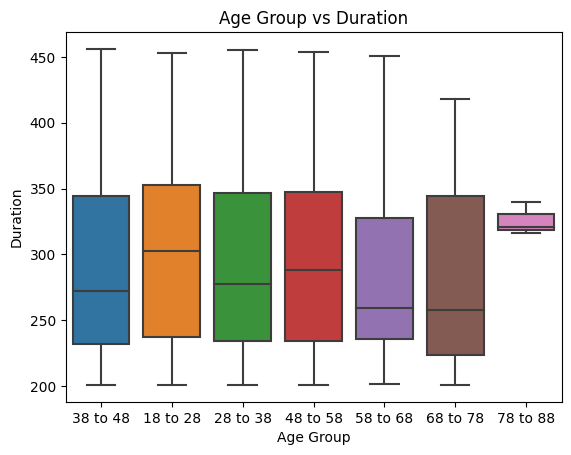

In [15]:

sns.boxplot( x="age_intervals",y="duration",data=df_control);
plt.title("Age Group vs Duration")
#plt.xticks(ticks =[0,1,2,3,4,5,6], labels= x_labels, rotation = 90);
plt.xlabel("Age Group")
plt.ylabel("Duration")
plt.show();
#plot_cat("age_label")

In [16]:

percent_diff("contact")

,contact,ctrl,succ,diff
0,telephone,37.664474,22.021661,-15.642813
1,cellular,62.335526,77.978339,15.642813


Cellular outcomes were much better than telephone

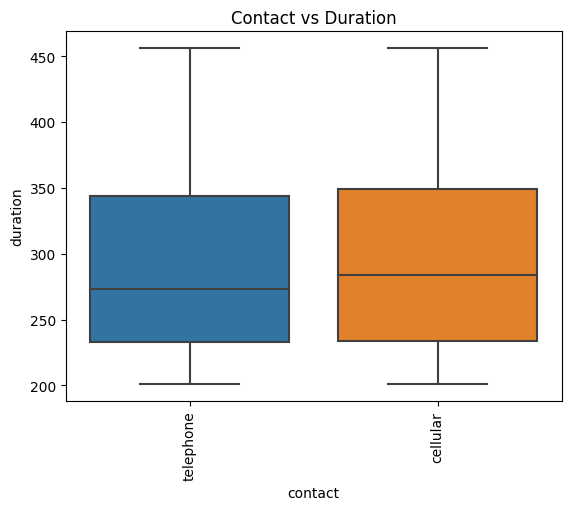

In [17]:
plot_cat("contact")

In [18]:

percent_diff("month")

,month,ctrl,succ,diff
0,dec,0.657895,1.805054,1.147159
1,mar,1.151316,2.166065,1.014749
2,oct,1.315789,3.249097,1.933308
3,sep,1.562500,2.527076,0.964576
4,apr,6.003289,9.025271,3.021981
5,nov,9.868421,7.581227,-2.287194
6,jun,12.664474,16.967509,4.303035
7,aug,14.309211,12.274368,-2.034842
8,jul,16.036184,18.050542,2.014357
9,may,36.430921,26.353791,-10.077130


November, July, and May were the least successful months.

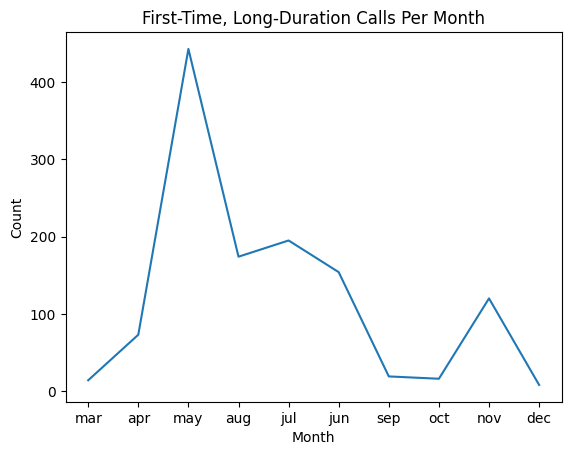

In [19]:

df_control
df_month_counts = df_control.month.value_counts().reset_index()
df_month_counts.columns = ["Month","Count"] 
df_month_counts["month_num"] = [5,7,6,8,11,4,9,10,3,12]
df_month_counts = df_month_counts.sort_values(by="month_num")
sns.lineplot(data=df_month_counts, x="Month", y="Count")
plt.title("First-Time, Long-Duration Calls Per Month");


The low success rate could be due to the high number (peaks) of calls in November, July, and May

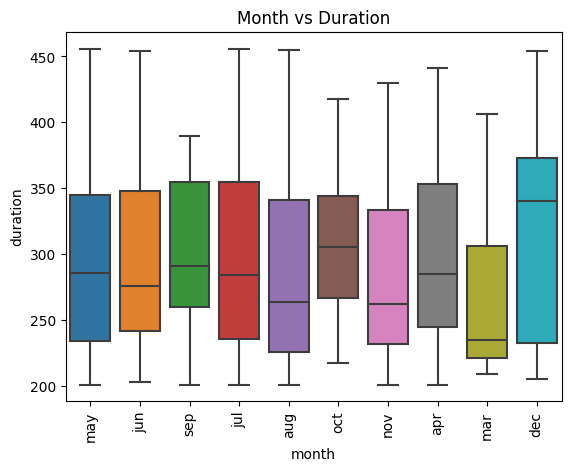

In [20]:
plot_cat("month")

July median is higher than most

In [21]:
percent_diff("education")

,education,ctrl,succ,diff
0,unknown,4.687500,4.693141,0.005641
1,basic.6y,6.578947,4.693141,-1.885807
2,basic.4y,9.457237,10.830325,1.373088
3,professional.course,14.062500,13.718412,-0.344088
4,basic.9y,14.309211,11.913357,-2.395853
5,high.school,20.888158,21.660650,0.772492
6,university.degree,30.016447,32.490975,2.474527


First-time, Long-duration calls to those with a university degree was by far the most successful

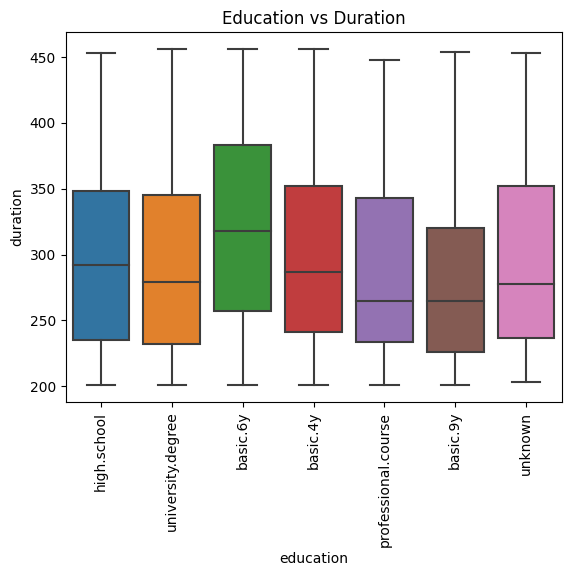

In [22]:
plot_cat("education")

#Basic.6y has a lower median

In [23]:
percent_diff("loan")

,loan,ctrl,succ,diff
0,unknown,2.467105,1.805054,-0.662051
1,yes,15.296053,15.523466,0.227413
2,no,82.236842,82.671480,0.434638


Calls to those with a personal loan were signficanty successful. It is possible that those who have a personal loan are more likely to have said yea to a markeing campaign in the past.

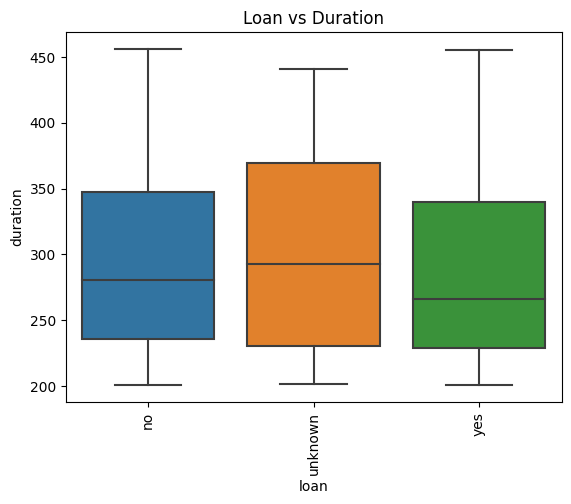

In [24]:
plot_cat("loan")

In [25]:
percent_diff("marital")

,marital,ctrl,succ,diff
0,unknown,0.411184,0.361011,-0.050173
1,divorced,11.430921,11.191336,-0.239585
2,single,26.726974,31.407942,4.680969
3,married,61.430921,57.039711,-4.391210


Calls to single individuals was 4.54% more succesful and those to marries individauals was %4.62 less successful.

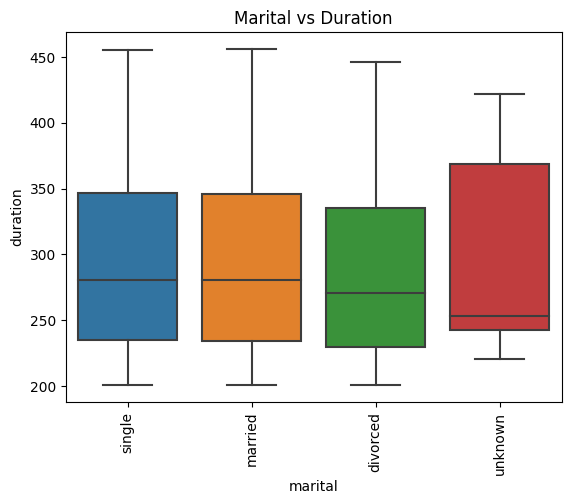

In [26]:
plot_cat("marital")

In [27]:

percent_diff("job")

,job,ctrl,succ,diff
0,unknown,1.069079,0.722022,-0.347057
1,student,1.891447,3.249097,1.357650
2,housemaid,2.549342,2.527076,-0.022266
3,self-employed,2.960526,2.888087,-0.072440
4,unemployed,3.125000,3.971119,0.846119
5,entrepreneur,3.289474,2.888087,-0.401387
6,retired,3.865132,6.498195,2.633063
7,management,7.894737,6.498195,-1.396542
8,services,9.539474,8.303249,-1.236225
9,technician,17.434211,17.689531,0.255320


Individauls who work as admin jobs or who are retired seem most likely to say yes and blue_collar workers are least likely

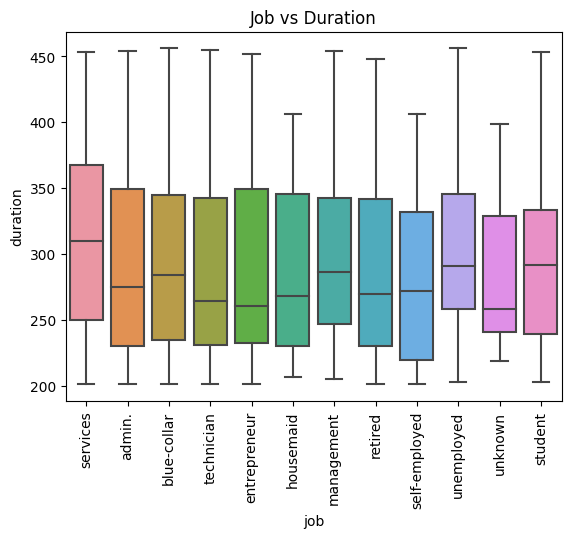

In [28]:
plot_cat("job")

In [29]:
percent_diff("housing")


,housing,ctrl,succ,diff
0,unknown,2.467105,1.805054,-0.662051
1,no,44.736842,47.653430,2.916587
2,yes,52.796053,50.541516,-2.254536


Those without mortgage are more likely to say yes.

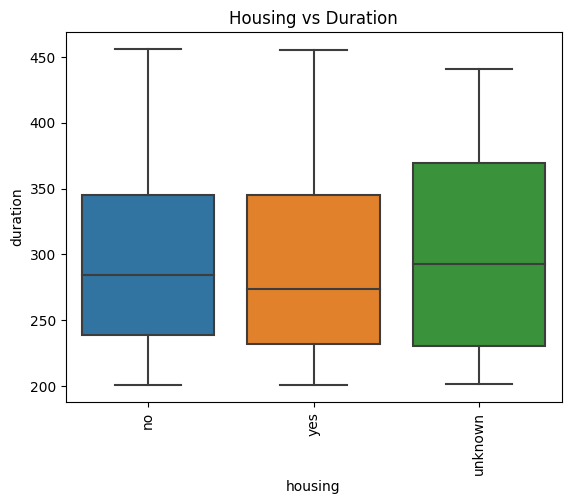

In [30]:
plot_cat("housing")

In [ ]:

#cat_cols = ["job","marital","education","default","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]


#fig, axes = plt.subplots(2, 2, figsize=(15,15))
#for i,ax in enumerate(axes.ravel()):
for cat in cat_cols:
    #if the duration is greater than 5 minutes,is there a difference
 
    
    


In [ ]:


#cat_cols = ["job","marital","education","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]

fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i,ax in enumerate(axes.ravel()):
    sns.boxplot(ax = ax, x=cat_cols[i],y="balance",data=df[df.balance < 10000]);
    plt.xticks(rotation = 90);
    
#Todo: remove outliers form balance
#todo: remove zero days form pdays


In [34]:

df.columns
#df.groupby("campaign").agg({"y":"value_count"})
df_yes = df[["campaign","y"]][df.y == "yes"].value_counts().reset_index()
df_yes.columns = ["campaign","y","yes_count"]
df_total = df[["campaign"]].value_counts().reset_index()
df_total.columns = ["campaign","total_count"]
df_merged = df_yes.merge(df_total, how="inner",on="campaign")


df_merged["percent"] = df_merged.yes_count/df_merged.total_count
successful_camapigns = df_merged[df_merged.total_count > 30].sort_values(by="percent", ascending = False).campaign.to_list()
#total count must be greater thatn 30 as a standard benchmark



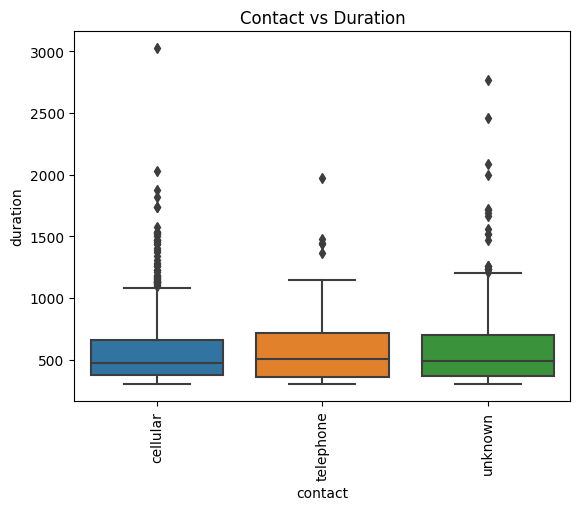

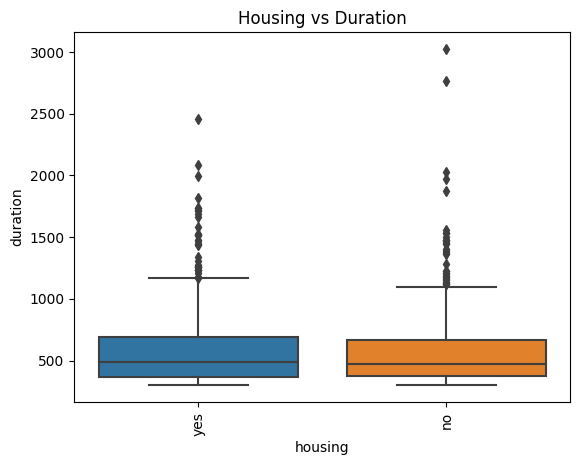

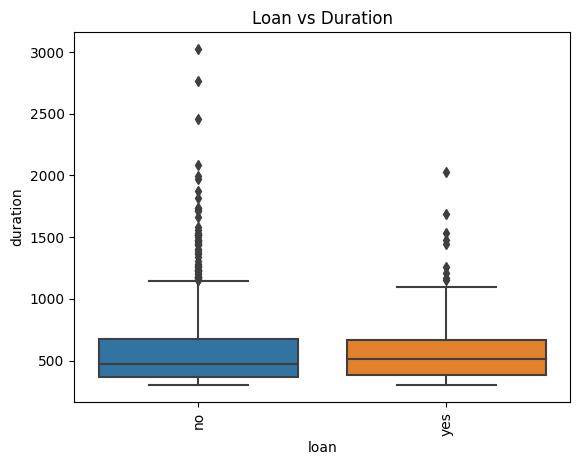

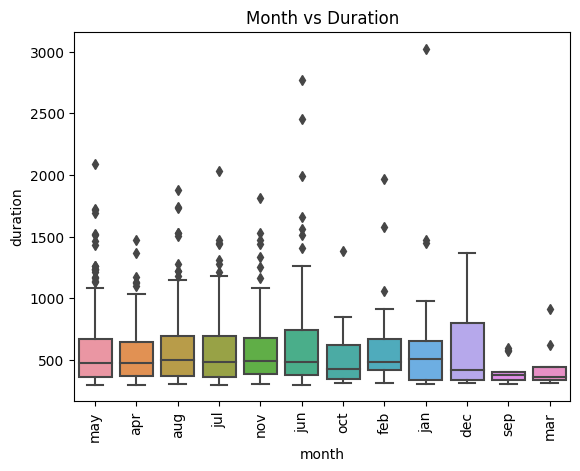

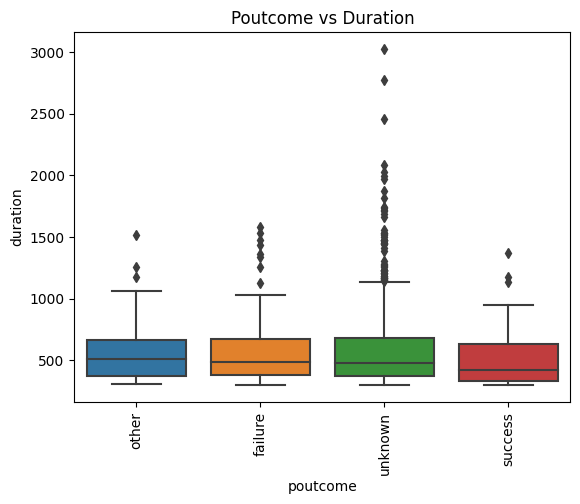

In [41]:
#cat_cols = ["job","marital","education","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]

#fig, axes = plt.subplots(2, 2, figsize=(15,15))
#for i,ax in enumerate(axes.ravel()):
for cat in cat_cols:
    sns.boxplot( x=cat,y="duration",data=df[df.campaign.isin(successful_camapigns) & (df.duration > 300)]);
    plt.title(cat.capitalize()+  " vs Duration")
    plt.xticks(rotation = 90);
    plt.show();
    

In [11]:

#df_success = df_add[df_add.campaign.isin(successful_camapigns) & mask]
df_success = df[(df.y == "yes") & mask]
df_control = df[mask]

cols = ["day_of_week","job","marital","loan","education","month","age_label"]
#ToDo: group by age
for c in cols:

    ctrl = df_control[c].value_counts(normalize=True).sort_values()*100
    succ = df_success[c].value_counts(normalize=True).sort_values()*100
    print()
    print(c)
    display(succ-ctrl)


day_of_week


fri   -0.916284
mon    2.285012
thu   -2.806380
tue   -1.983475
wed    3.421126
Name: day_of_week, dtype: float64


job


admin.           4.289053
blue-collar     -5.867051
entrepreneur    -0.422152
housemaid        0.140625
management      -1.738911
retired          1.956240
self-employed   -0.653099
services        -1.165573
student          1.093593
technician       1.677214
unemployed       0.814845
unknown         -0.124784
Name: job, dtype: float64


marital


unknown    -0.023901
divorced    0.105885
single      4.541122
married    -4.623106
Name: marital, dtype: float64


loan


unknown   -0.658379
yes        1.050794
no        -0.392415
Name: loan, dtype: float64


education


basic.4y               0.360733
basic.6y              -1.850354
basic.9y              -1.866473
high.school           -0.818180
professional.course    0.169528
university.degree      3.853561
unknown                0.151185
Name: education, dtype: float64


month


apr    2.404793
aug    0.111166
dec    1.189196
jul   -0.964085
jun    4.496377
mar    1.473224
may   -9.981852
nov   -1.733630
oct    1.940398
sep    1.064412
Name: month, dtype: float64


age_label


0   -0.791222
1   -1.200868
2   -4.887681
3    1.438207
4    3.708212
5    0.467174
6    1.266178
Name: age_label, dtype: float64

In [ ]:




fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i,ax in enumerate(axes.ravel()):
    sns.boxplot(ax = ax, x=cat_cols[i],y="previous",data=df[df.previous > 0]);
    plt.xticks(rotation = 90);

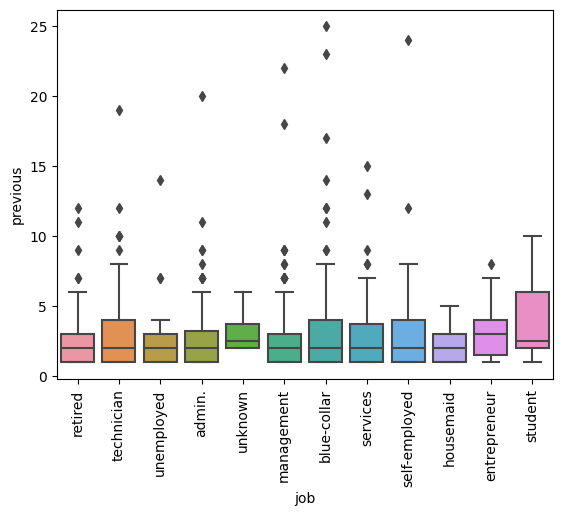

In [113]:
sns.boxplot( x="job",y="previous",data=df[df.previous > 0]);
plt.xticks(rotation = 90);

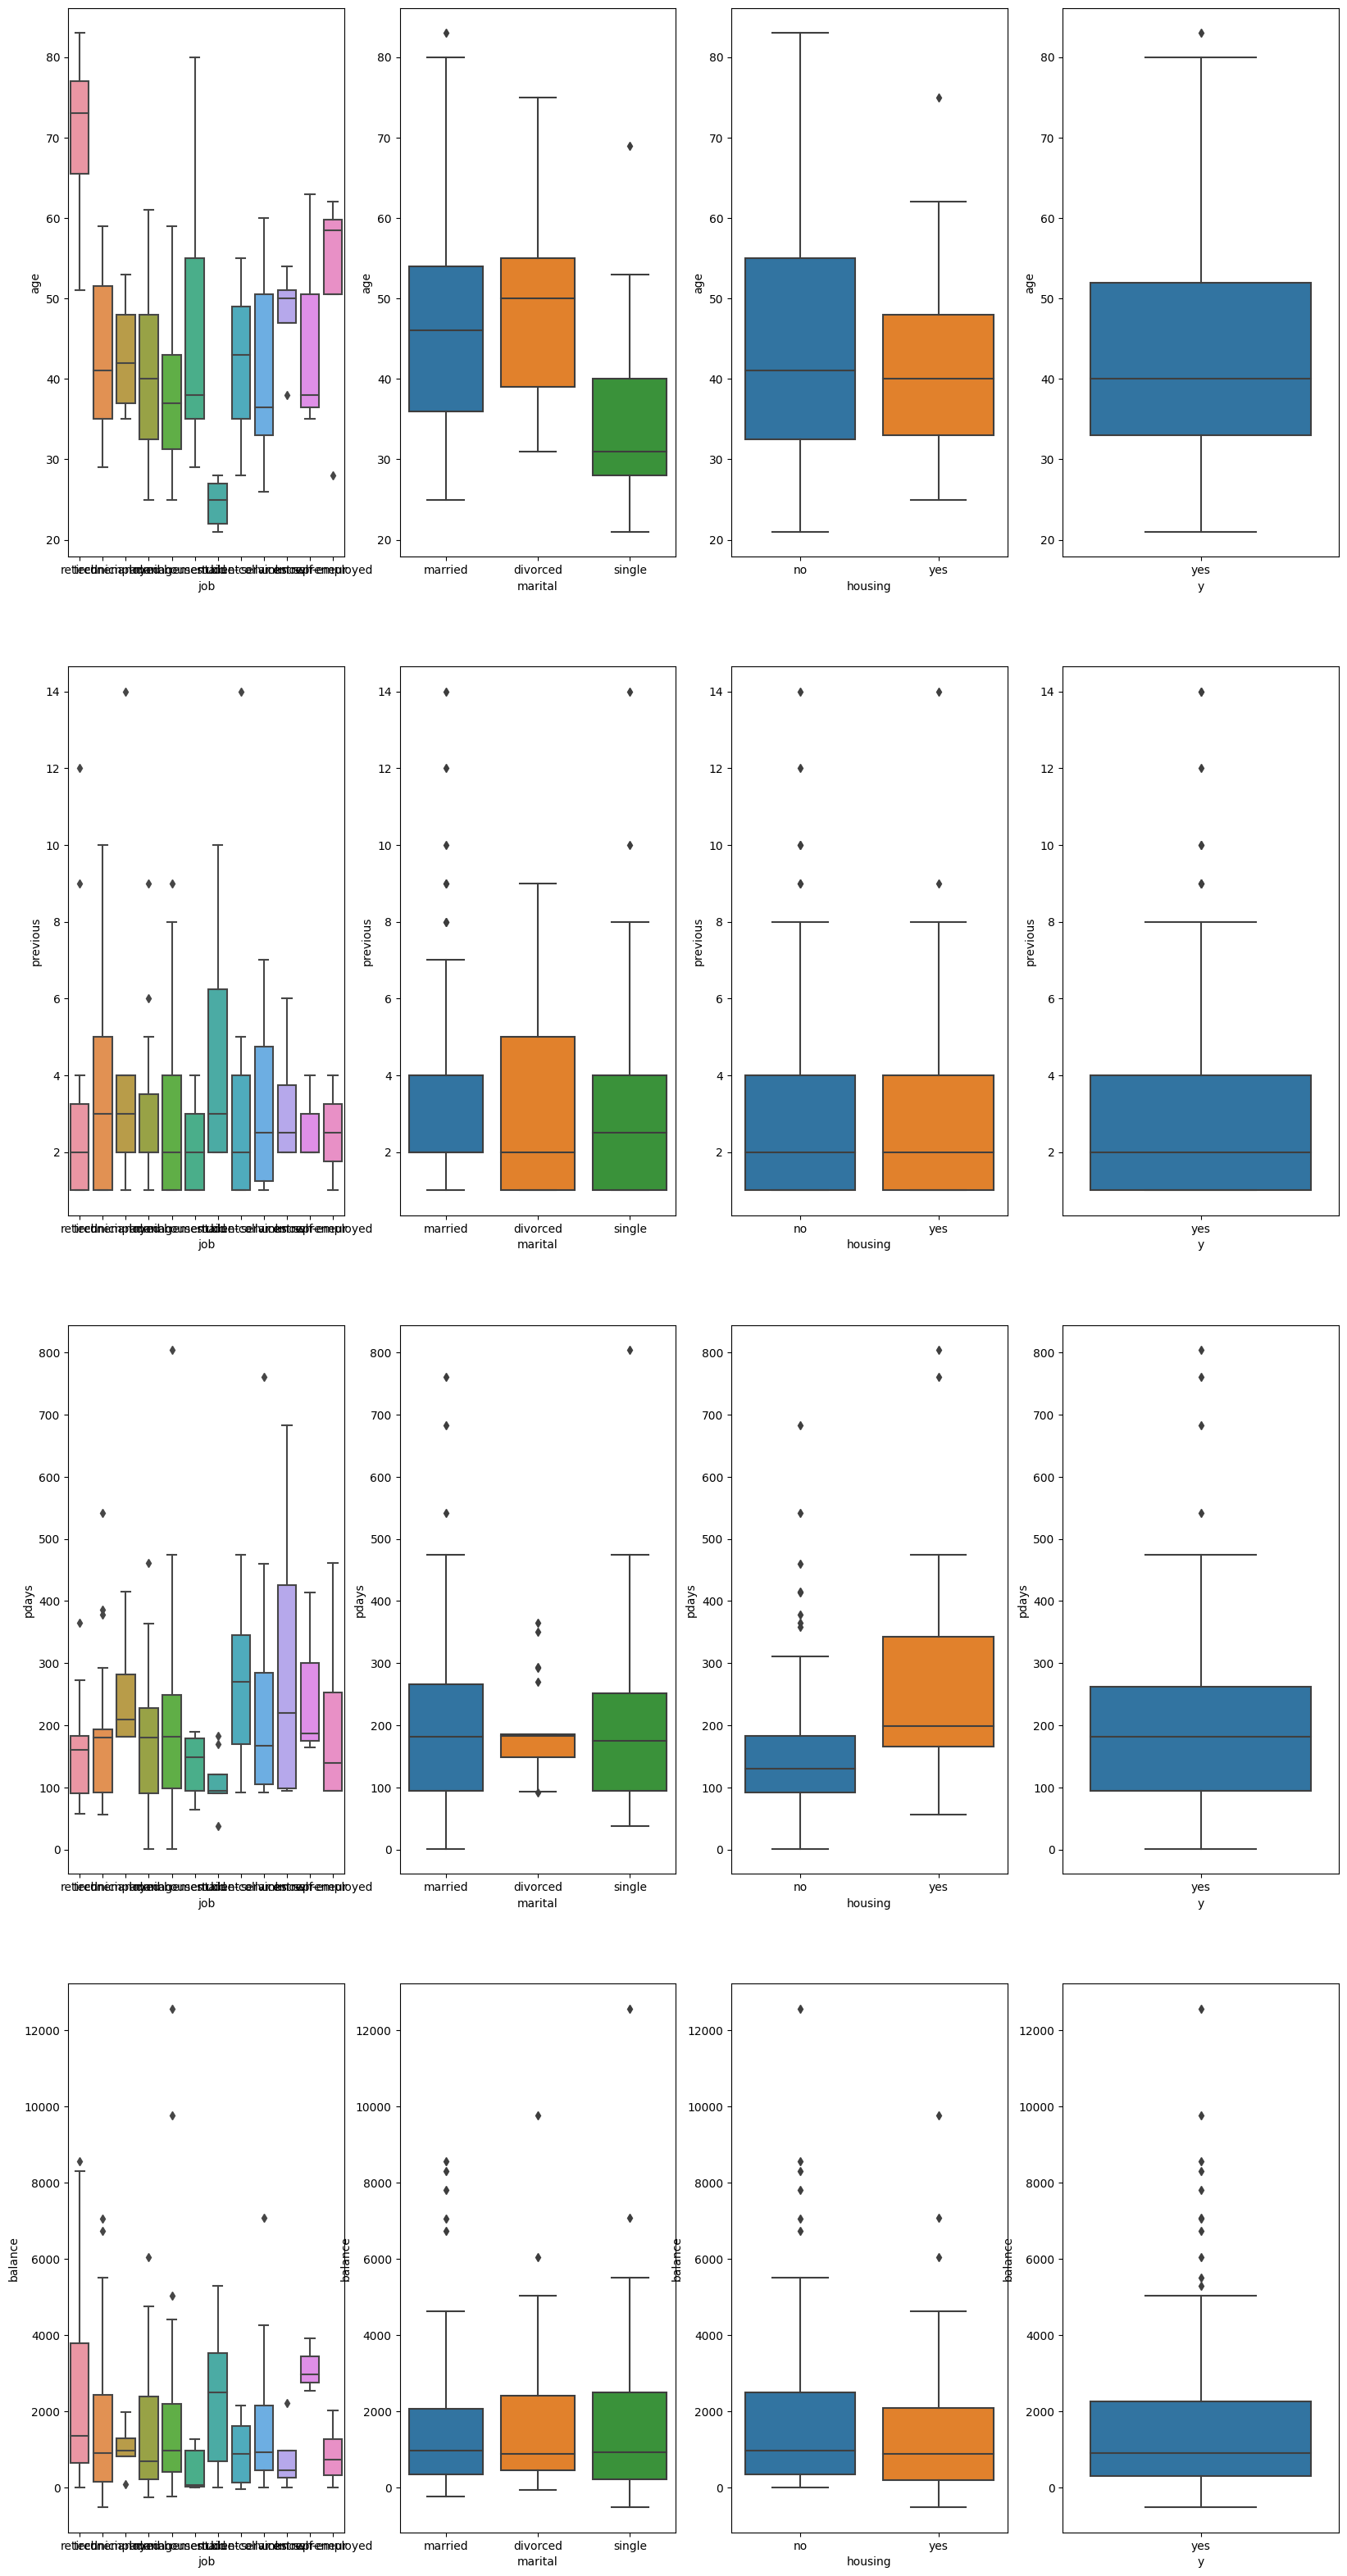

In [136]:

def display_boxplots(df):
    num_cols = ["age","previous","pdays","balance"]
    cat_cols = ["job","marital","housing","y"]
    
    fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(20,40))
    for i,ax in enumerate(axes.ravel()):
        row = i // 4
        col = i % 4
        #print(row,col)
        sns.boxplot(ax=ax, x=cat_cols[col],y=num_cols[row],data=df[df.previous > 0]);
        #plt.xticks(rotation = 90);
display_boxplots(df[df.y == "yes"])    

In [35]:
df_merged["percent"] = df_merged.yes_count/df_merged.total_count
#df[["campaign","y"]].sort_values(by="campaign").value_counts().reset_index()
df_merged

,campaign,y,yes_count,total_count,percent
0,1,yes,219,1764,0.124150
1,2,yes,119,1039,0.114533
2,3,yes,62,549,0.112933
3,4,yes,32,291,0.109966
4,5,yes,9,142,0.063380
5,6,yes,4,99,0.040404
6,8,yes,2,36,0.055556
7,7,yes,1,60,0.016667
8,9,yes,1,32,0.031250
9,10,yes,1,20,0.050000


In [31]:
df_dummy = pd.get_dummies(data=df,columns=["education","housing","loan","job","default","marital"])



In [32]:

len(df.columns)
len(df_dummy.columns)
sel_cols = ["campaign"] + df_dummy.columns[19:].to_list() 
df_dummy2 = df_dummy.groupby("campaign").sum().reset_index()[sel_cols]


/var/folders/2n/5k95xl754cb_szsgjkmj33k80000gn/T/ipykernel_35852/4209622622.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dummy2 = df_dummy.groupby("campaign").sum().reset_index()[sel_cols]


In [36]:
df_counts = df_merged.merge( df_dummy2,on="campaign",how="inner")

In [37]:
df_counts.sort_values(by="percent", ascending=False)[df_counts.total_count > 10]
#df_counts.loan_yes/df_counts.total_count
#Todo: why not include campaigns with yes = 0
#Todo: month, day,dayofweek

/var/folders/2n/5k95xl754cb_szsgjkmj33k80000gn/T/ipykernel_35852/2329751700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_counts.sort_values(by="percent", ascending=False)[df_counts.total_count > 10]


,campaign,y,yes_count,total_count,percent,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_no,default_unknown,default_yes,marital_divorced,marital_married,marital_single,marital_unknown
0,1,yes,219,1764,0.124150,396,0,215,544,70,767,40,957,1439,40,285,437,387,68,47,145,70,59,153,40,289,52,17,1436,328,0,194,1074,488,8
1,2,yes,119,1039,0.114533,221,0,154,324,39,461,24,554,840,24,175,248,204,42,29,82,42,33,101,26,198,27,7,850,188,1,109,616,313,1
2,3,yes,62,549,0.112933,131,0,69,149,27,263,22,264,434,22,93,121,136,21,13,39,24,25,58,8,86,11,7,427,122,0,49,353,147,0
3,4,yes,32,291,0.109966,63,1,39,81,15,136,9,146,238,9,44,70,66,5,8,23,19,19,27,4,39,5,6,228,63,0,35,175,81,0
4,5,yes,9,142,0.063380,34,0,18,48,2,66,2,74,124,2,16,37,29,6,5,12,3,8,13,2,24,2,1,109,33,0,18,91,33,0
6,8,yes,2,36,0.055556,6,0,7,12,2,13,0,23,29,0,7,8,8,0,2,3,3,2,2,0,6,2,0,29,7,0,6,15,14,1
10,11,yes,1,19,0.052632,4,0,3,8,0,10,0,9,16,0,3,8,4,2,0,1,0,0,1,0,2,1,0,15,4,0,1,10,8,0
9,10,yes,1,20,0.050000,8,0,1,6,1,6,3,11,15,3,2,9,2,0,0,1,1,3,1,0,1,1,1,15,5,0,3,14,2,1
5,6,yes,4,99,0.040404,25,0,10,31,3,43,1,55,77,1,21,28,20,1,4,8,2,2,16,1,15,2,0,83,16,0,13,66,20,0
8,9,yes,1,32,0.031250,6,0,5,12,3,13,0,19,26,0,6,9,5,2,0,1,0,1,5,0,6,3,0,24,8,0,5,21,6,0


<AxesSubplot: ylabel='percent'>

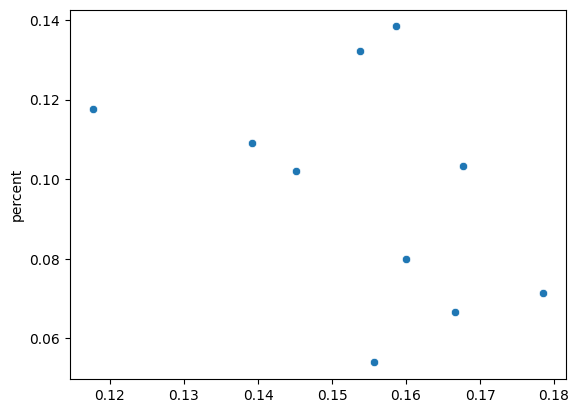

In [218]:
#df_counts.loc[:,df_counts.columns.str.startswith("loan_")]
pct_yes_loan  = df_counts["loan_yes"]/df_counts["total_count"]
#df_counts["percent"] = df_counts["percent"]/100
df_counts["percent"][:10]
sns.scatterplot(x=pct_yes_loan,y=df_counts["percent"][:10],data=df_counts )


In [242]:
select_cols = df_counts.columns[np.array(df_counts.columns.str.startswith("marital_")).tolist()].tolist() + ["percent"]

select_cols
df_counts[select_cols].corr()

#Todo: unemployed correlation 


,marital_divorced,marital_married,marital_single,percent
marital_divorced,1.000000,0.992703,0.998146,0.069210
marital_married,0.992703,1.000000,0.997234,0.064917
marital_single,0.998146,0.997234,1.000000,0.072541
percent,0.069210,0.064917,0.072541,1.000000


<AxesSubplot: xlabel='y', ylabel='duration'>

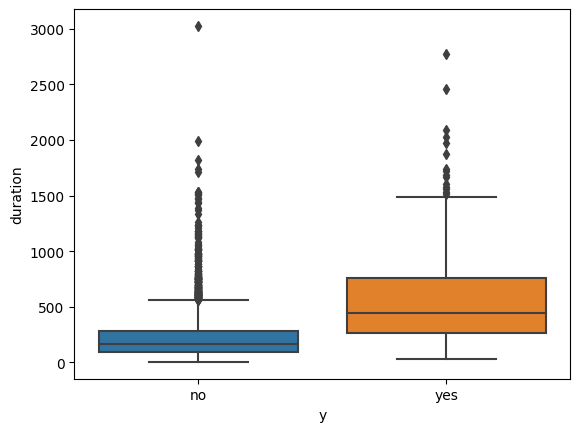

In [245]:
#Todo: Include this graph
sns.boxplot(x="y",y="duration",data=df)

In [251]:
d ={}
d["duration"] = ["max","median","min","count","mean","sum"]
df.groupby("month").agg(d)
#Todo: include


duration                                     
           max median min count        mean     sum
month                                              
apr       1472  224.0   5   293  294.354949   86246
aug       1877  159.0   5   633  243.742496  154289
dec       1370  317.5  69    20  416.900000    8338
feb       1971  176.0   8   222  255.698198   56765
jan       3025  181.5  24   148  269.540541   39892
jul       2029  186.5   5   706  271.205382  191471
jun       2769  163.0   5   531  252.425612  134038
mar        910  164.0  30    49  198.897959    9746
may       2087  198.0   4  1398  267.316166  373708
nov       1816  183.0   6   389  272.066838  105834
oct       1386  223.0   5    80  272.800000   21824
sep        595  184.5   9    52  215.730769   11218

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '(duration, max)'),
  Text(2, 0, '(duration, median)'),
  Text(3, 0, '(duration, min)'),
  Text(4, 0, '(duration, count)'),
  Text(5, 0, '(duration, mean)')])

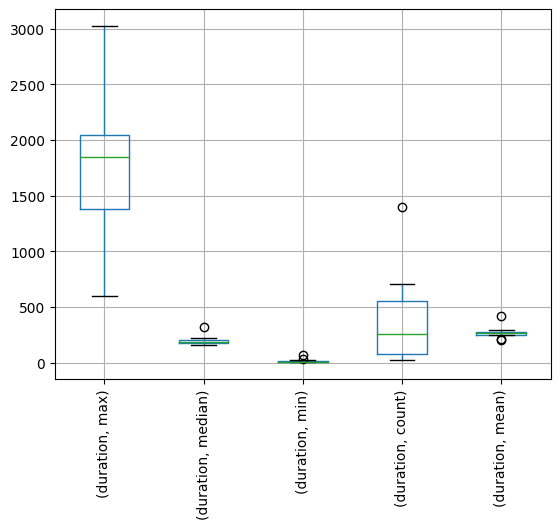

In [255]:
d ={}
d["duration"] = ["max","median","min","count","mean"]
df.groupby("month").agg(d).boxplot()
plt.xticks(rotation = 90)


<AxesSubplot: xlabel='month', ylabel='duration'>

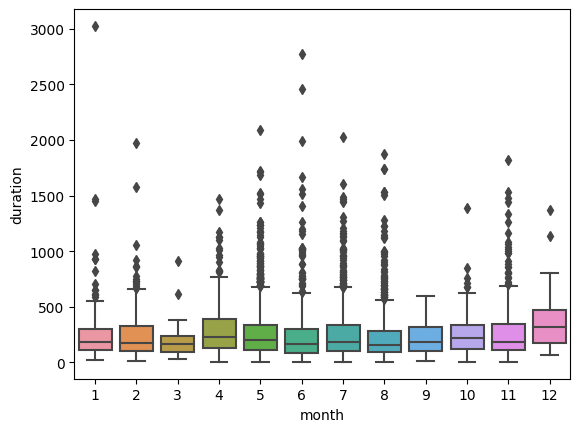

In [262]:
sns.boxplot(x="month", y="duration", data= df.sort_values(by="month"))
#Todo: include

In [264]:
df[df.y=="yes"].groupby(["month","y"])["duration"].sum().reset_index()

,month,y,duration
0,1,yes,8360
1,2,yes,17135
2,3,yes,5248
3,4,yes,24710
4,5,yes,63990
5,6,yes,35210
6,7,yes,45193
7,8,yes,45562
8,9,yes,5019
9,10,yes,12567


In [260]:

day_month = pd.to_datetime(df["month"] + "/"  +df["day"].astype(str) + "/2022" )
df["month"] = day_month.dt.month


In [84]:
df.month.unique()

array([10,  5,  4,  6,  2,  8,  1,  7, 11,  9,  3, 12], dtype=int64)

In [85]:

df_temp = df.sort_values(["campaign","month","day"]).reset_index().reset_index()
cols = df_temp.columns.tolist() #[0] = ["chrono_order"] #,"orig_order"]
cols[:2] = ["chrono_order","orig_order"]
df_temp.columns = cols
df = df_temp
#df["chrono_order"] = np.arange(df.sort_values(["campaign","month","day"]).shape[0])
#reset_index(drop=True)



<AxesSubplot: xlabel='chrono_order'>

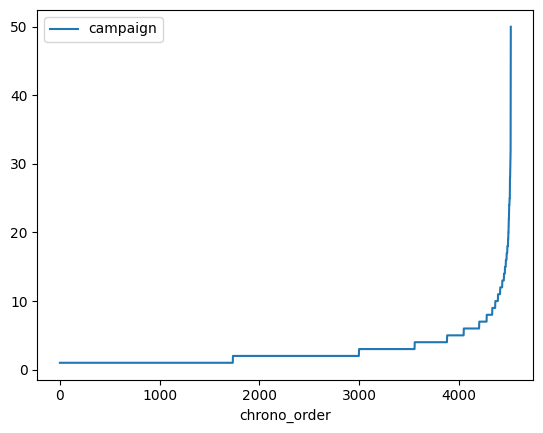

In [86]:
#campaigns over time
df.plot(x ="chrono_order",y ="campaign", kind="line")


In [87]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month","day"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []
df_camp.columns = ["campaign","month","day","duration","count"]


In [75]:
df_camp

,campaign,month,day,duration,count
0,1,10,1,3022,17
1,1,10,2,11926,58
2,1,10,3,8946,39
3,1,10,4,13623,55
4,1,10,5,25189,93
...,...,...,...,...,...
360,31,10,28,33,1
361,32,10,2,29,1
362,32,10,16,192,1
363,44,10,31,18,1


<AxesSubplot: xlabel='day', ylabel='count'>

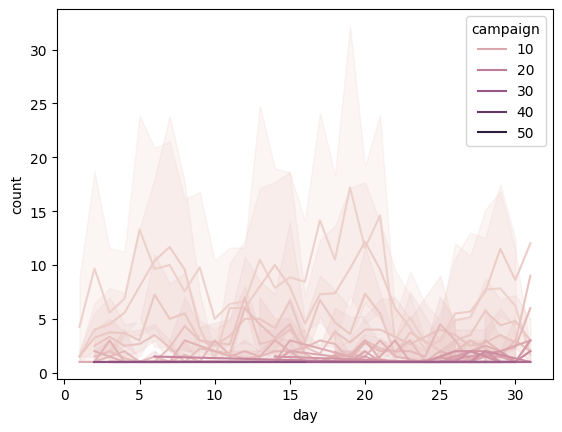

In [92]:
sns.lineplot(data=df_camp, x="day", y="count",hue="campaign")

In [76]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []

df_camp.columns = ["campaign","month","duration","count"]



In [79]:
df.month.unique()

array([10], dtype=int64)

<AxesSubplot: xlabel='month', ylabel='count'>

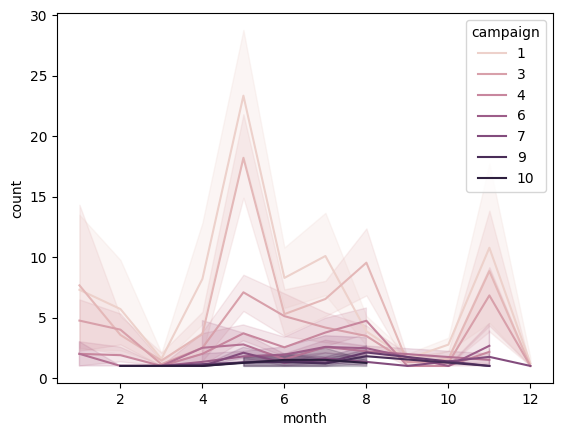

In [90]:
sns.lineplot(data=df_camp[df_camp.campaign < 11], x="month", y="count",hue="campaign")

In [ ]:
df  

In [ ]:

a = {}
a["age"] = ["mean","median"]
a["balance"] = ["mean","median"]
df.groupby("job").agg(a)


<AxesSubplot: >

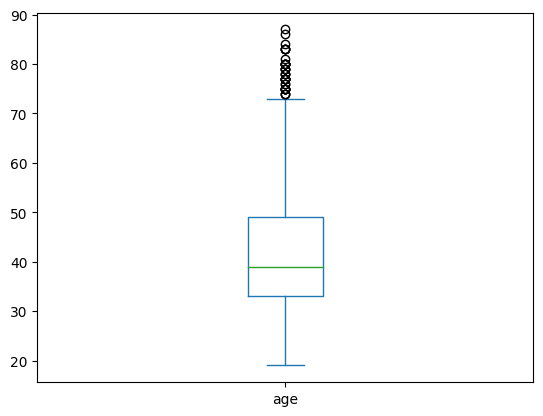

In [20]:

df["age"].sort_values().to_frame().reset_index(drop=True).plot(kind="box")


In [36]:
df["purpose"].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
vacation                 0
Name: purpose, dtype: int64

<AxesSubplot: >

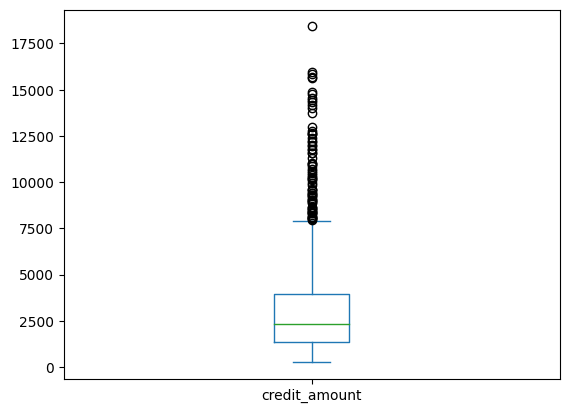

In [40]:
df["credit_amount"].plot(kind="box")



In [25]:
#EDA
mask = df.y == "yes"
df[mask]["loan"].value_counts(normalize=True)*100


no     91.746641
yes     8.253359
Name: loan, dtype: float64

In [31]:

vc = df[["y","loan","job","marital","education"]].value_counts().to_frame()


In [35]:
import seaborn as sns


<AxesSubplot: xlabel='education', ylabel='age'>

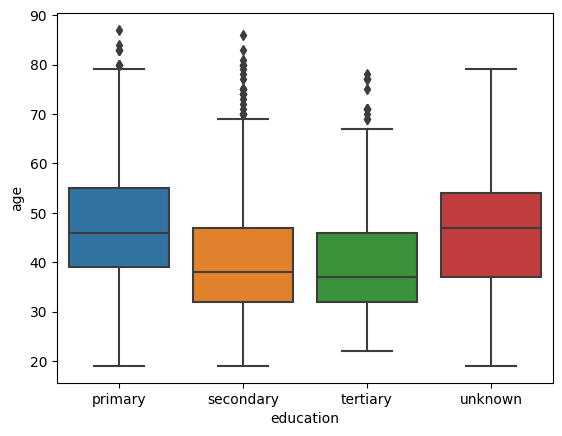

In [37]:

sns.boxplot(x="education",y ="age",data=df)


<AxesSubplot: >

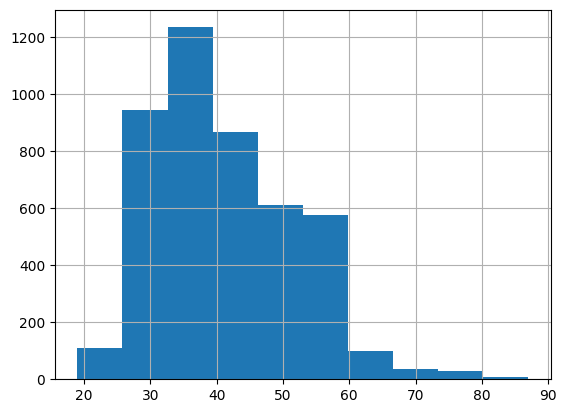

In [38]:
df["age"].hist()